In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

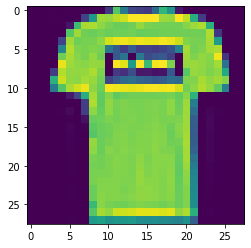

In [6]:
plt.imshow(train_images[1])

In [7]:
class_names[train_labels[1]]

'T-shirt/top'

In [ ]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [9]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
y_train_categorical = keras.utils.to_categorical(
    train_labels, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='float32'
)

In [17]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 43s 23ms/step - loss: 0.6356 - accuracy: 0.7928


In [19]:
np.argmax(model.predict(test_images_scaled)[0])

9

In [20]:
y_test_categorical[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# **Lets Run on GPU**

In [11]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(train_images_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 66s 35ms/step - loss: 0.6412 - accuracy: 0.7898
1 loop, best of 1: 1min 6s per loop


In [13]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(train_images_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 13s 6ms/step - loss: 0.6360 - accuracy: 0.7926
1 loop, best of 1: 15.8 s per loop


In [16]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(train_images_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.6385 - accuracy: 0.7914
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4523 - accuracy: 0.8438
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4110 - accuracy: 0.8569
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3859 - accuracy: 0.8645
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3666 - accuracy: 0.8712
1 loop, best of 1: 5min 20s per loop


In [15]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(train_images_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6405 - accuracy: 0.7925
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4548 - accuracy: 0.8425
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4132 - accuracy: 0.8559
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3860 - accuracy: 0.8660
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3662 - accuracy: 0.8716
1 loop, best of 1: 55.1 s per loop
